In [1]:
import pandas as pd

#### Zadatak 1.

In [2]:
df = pd.read_csv('loan.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [3]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


Dataset sadrži 61 red i 8 kolona.

Kratak pregled kolona:

- age (int): Starost podnosioca zahtjeva.
- gender (object): Spol podnosioca zahtjeva.
- occupation (object): Zanimanje podnosioca zahtjeva.
- education_level (object): Obrazovni nivo podnosioca zahtjeva.
- martial_status (object): Bračni status podnosioca zahtjeva.
- income (int): Godišnji prihod podnosioca zahtjeva.
- credit_score (int): Kreditni rezultat podnosioca zahtjeva.
- loan_status (object): Status kredita (Odobren ili Odbijen).


#### Zadatak 2.

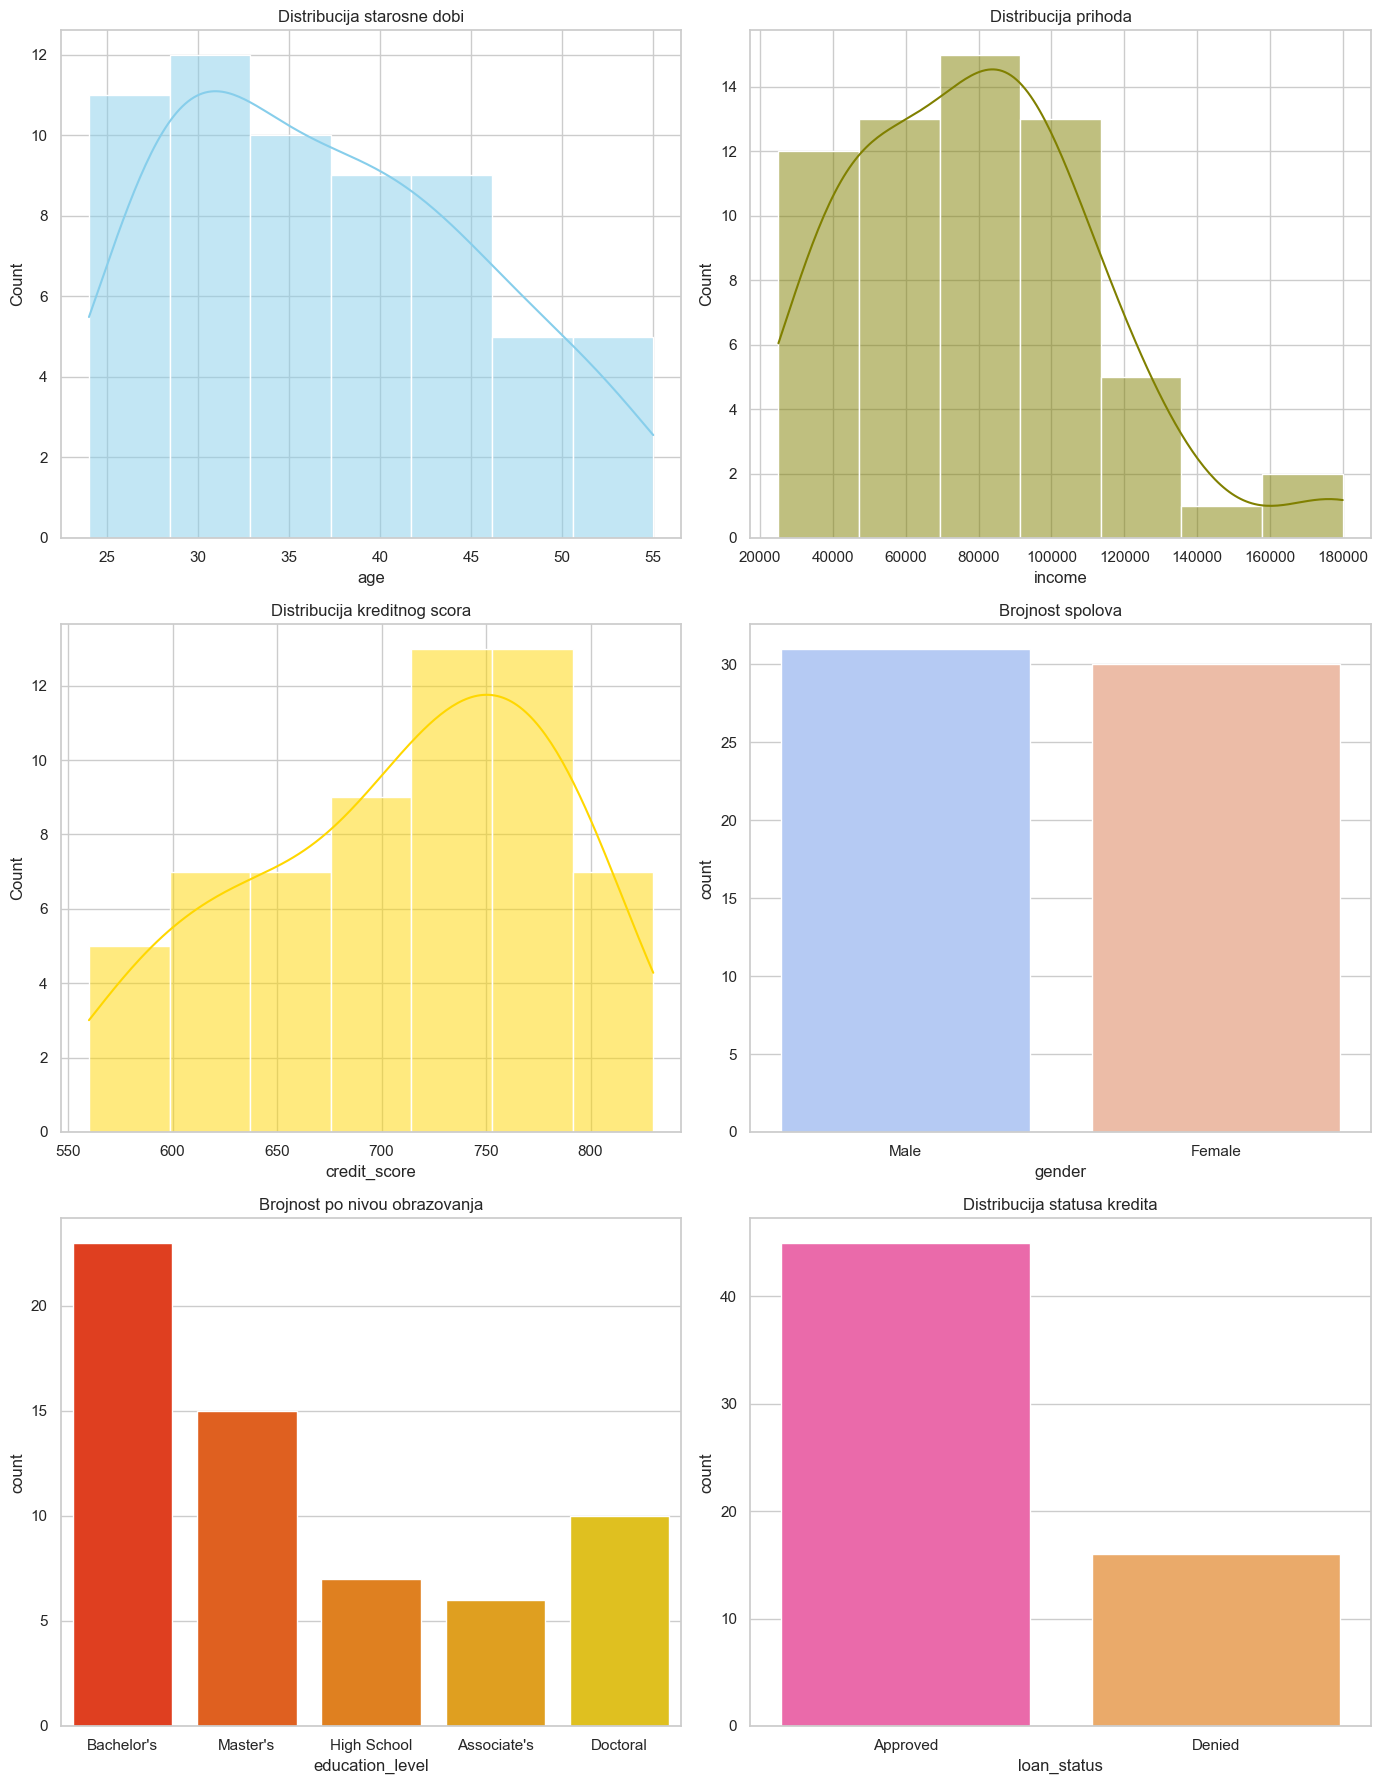

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Postavljanje estetskog stila grafikona
sns.set(style="whitegrid")

# Kreiranje figure za subplotove
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Histogrami za numeričke kolone
sns.histplot(data=df, x='age', kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribucija starosne dobi')
sns.histplot(data=df, x='income', kde=True, ax=axes[0, 1], color='olive')
axes[0, 1].set_title('Distribucija prihoda')
sns.histplot(data=df, x='credit_score', kde=True, ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Distribucija kreditnog scora')

# Count plotovi za kategoričke kolone
sns.countplot(data=df, x='gender', ax=axes[1, 1], hue='gender', palette='coolwarm', legend=False)
axes[1, 1].set_title('Brojnost spolova')
sns.countplot(data=df, x='education_level', ax=axes[2, 0], hue='education_level', palette='autumn', legend=False)
axes[2, 0].set_title('Brojnost po nivou obrazovanja')
sns.countplot(data=df, x='loan_status', ax=axes[2, 1], hue='loan_status', palette='spring', legend=False)
axes[2, 1].set_title('Distribucija statusa kredita')

# Prilagođavanje izgleda
plt.tight_layout()
plt.show()



Pregled raspodjele promenljivih u datasetu:

- Starost: Distribucija izgleda relativno ravnomjerno sa blagim porastom u određenim godištima.
- Prihod: Većina podnosilaca zahtjeva ima prihod ispod 100,000, sa vrhuncem oko srednjih vrednosti.
- Kreditni Rezultat: Distribucija je prilično normalna sa skoncentrisanom raspodjelom oko srednjih vrednosti kreditnih ocjena.

Za kategoričke promenljive:

- Spol: Približno izbalansiran broj muških i ženskih podnosilaca zahtjeva.
- Nivo Obrazovanja: Većina podnosilaca zahtjeva ima "Bachelor's" stepen obrazovanja, slijede "Master's", a zatim "High School".
- Status Kredita: Više zahtjeva je odobreno nego odbijeno.



### Zadatak 3

In [17]:
# Statističke karakteristike numeričkih kolona
numerical_summary = df.describe()

numerical_summary

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


Statistički opis numeričkih kolona

- Starost: Prosječna starost je oko 37 godina, sa standardnom devijacijom od oko 8.4 godine. Raspon je od 24 do 55 godina.
- Prihod: Prosječan godišnji prihod je približno 79 000 dolara, sa standardnom devijacijom od oko 33 772 dolara. Prihodi se kreću od 25 000 do 180 000 dolara.
- Kreditni rezultat: Prosječan kreditni skor je oko 710, sa standardnom devijacijom od oko 73. Skorovi variraju od 560 do 830.



In [5]:
# Provjera nedostajućih vrijednosti
missing_values = df.isnull().sum()

missing_values

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

Kao što se vidi, nedostajućih vrijednosti nema u dataset-u, što olakšava sljedeći korak pripreme podataka za logističku regresiju.

In [19]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


#### Zadatak 4.

Sada ćemo izvršiti kodiranje kategoričkih promenljivih koristeći One-hot encoding (za više kategorija) i Label encoding (za binarne kategorije, kao što je loan_status). Takođe, normalizovaćemo ili standardizovaćemo numeričke podatke kako bismo ih pripremili za model.

In [6]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler


# One-hot encoding za varijable za sve kategoričke varijable osim target varijable
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(df[['gender', 'occupation', 'education_level', 'marital_status']])
encoded_categorical_df = pd.DataFrame(encoded_categorical.toarray(), columns=encoder.get_feature_names_out())

# Label encoding za target varijablu
label_encoder = LabelEncoder()
df['loan_status_encoded'] = label_encoder.fit_transform(df['loan_status'])

# Dodavanje enkodiranih varijabli(kolona) sa orginalnim DataFrame-om
loan_data_prepared = pd.concat([df.drop(['gender', 'occupation', 'education_level', 'marital_status', 'loan_status'], axis=1), encoded_categorical_df], axis=1)

# Skaliranje numeričkih kolona
scaler = StandardScaler()
loan_data_prepared[['age', 'income', 'credit_score']] = scaler.fit_transform(loan_data_prepared[['age', 'income', 'credit_score']])

loan_data_prepared.head()

,age,income,credit_score,loan_status_encoded,gender_Female,gender_Male,occupation_Accountant,occupation_Analyst,occupation_Architect,occupation_Artist,...,occupation_Teacher,occupation_Veterinarian,occupation_Writer,education_level_Associate's,education_level_Bachelor's,education_level_Doctoral,education_level_High School,education_level_Master's,marital_status_Married,marital_status_Single
0,-0.608224,0.179626,0.141015,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.947653,-0.507063,-0.413949,0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-1.086956,-1.611737,-1.662618,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.665750,0.776746,0.973462,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.129493,-0.118935,0.002274,0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#### Podaci su uspješno pripremljeni za model logističke regresije:

- One-hot kodiranje je primijenjeno na kategoričke promjenljive sa više kategorija (spol, zanimanje, obrazovni nivo, bračni status), što rezultira dodatnim kolonama za svaku kategoriju.
- Label encoding je primijenjen na ciljnu promjenljivu loan_status, gdje je 'Approved' kodiran kao 0, a 'Denied' kao 1.
- Standardizacija je primijenjena na numeričke kolone (starost, prihod, kreditni rezultat), čime su podaci skalirani tako da imaju srednju vrijednost 0 i standardnu devijaciju 1.


#### Zadatak 5.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Definisanje karakteristika i target(ciljane) varijable
X = loan_data_prepared.drop('loan_status_encoded', axis=1)
y = loan_data_prepared['loan_status_encoded']

# Podjela podataka na trening i test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicijalizacija i treniranje Logističke regresije
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predikcija (tj. klasifikacija) na testnim podacima
y_pred = logistic_model.predict(X_test)

# Evaluacija modela, računanje confusion matrix i tačnosti
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Tačnost našeg modela je: {accuracy*100} %")
print(f"Confusion matrix: \n {conf_matrix}")

Tačnost našeg modela je: 92.3076923076923 %
Confusion matrix: 
 [[8 1]
 [0 4]]


Tačnost modela: 92.31%

Confusion Matrix:
- 8 tačnih predikcija za 'Approved' (stvarna klasa: Approved, predviđena klasa: Approved)
- 1 greška predikcije za 'Approved' (stvarna klasa: Approved, predviđena klasa: Denied)
- 4 tačne predikcije za 'Denied' (stvarna klasa: Denied, predviđena klasa: Denied)
